In [1]:
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.shape

(13320, 9)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
#replacing null values with objects
df.society = df.society.fillna("No data")
df.balcony = df.balcony.fillna("No data")

In [9]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
society          0
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [12]:
df.shape

(13246, 9)

In [13]:
print(df['area_type'].unique())
print(df['balcony'].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
[1.0 3.0 'No data' 2.0 0.0]


In [14]:
print(df['size'].unique())

['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' '9 Bedroom' '27 BHK' '10 Bedroom'
 '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom' '14 BHK' '8 BHK'
 '12 Bedroom' '13 BHK' '18 Bedroom']


In [15]:
df.drop(columns=['area_type','balcony','availability','society'],inplace=True)

In [16]:
df['price']=df['price']*100000

In [17]:
df['price']

0         3907000.0
1        12000000.0
2         6200000.0
3         9500000.0
4         5100000.0
            ...    
13315    23100000.0
13316    40000000.0
13317     6000000.0
13318    48800000.0
13319     1700000.0
Name: price, Length: 13246, dtype: float64

In [18]:
df['size'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [19]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
df[~df['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,18600000.0
122,Hebbal,4,3067 - 8156,4.0,47700000.0
137,8th Phase JP Nagar,2,1042 - 1105,2.0,5400500.0
165,Sarjapur,2,1145 - 1340,2.0,4349000.0
188,KR Puram,2,1015 - 1540,2.0,5680000.0


In [22]:
def num(x):
    temp=x.split('-')
    if len(temp)==2:
        return(float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [23]:
df2=df.copy()
df2['total_sqft'] =df2['total_sqft'].apply(num)
df2.head(20)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,3907000.0
1,Chikka Tirupathi,4,2600.0,5.0,12000000.0
2,Uttarahalli,3,1440.0,2.0,6200000.0
3,Lingadheeranahalli,3,1521.0,3.0,9500000.0
4,Kothanur,2,1200.0,2.0,5100000.0
5,Whitefield,2,1170.0,2.0,3800000.0
6,Old Airport Road,4,2732.0,4.0,20400000.0
7,Rajaji Nagar,4,3300.0,4.0,60000000.0
8,Marathahalli,3,1310.0,3.0,6325000.0
9,Gandhi Bazar,6,1020.0,6.0,37000000.0


In [24]:
df.loc[25]

location      Mangammanapalya
size                        3
total_sqft               1250
bath                      3.0
price               5600000.0
Name: 25, dtype: object

In [25]:
def sqmt_to_sqft(x):
    """convert sq.meters to sqft"""
    return x * 10.764

def sqyards_to_sqft(x):
    """convert sq.yards to sqft"""
    return x * 9

def gunta_to_sqft(x):
    """convert gunta to sqft"""
    return x * 1089

def acres_to_sqft(x):
    """convert acres to sqft"""
    return x * 43560

def perch_to_sqft(x):
    """convert perch to sqft"""
    return x * 272.25

def grounds_to_sqft(x):
    """convert grounds to sqft"""
    return x * 2400

def cents_to_sqft(x):
    """convert cents to sqft"""
    return x * 435.6

In [26]:
def catch_abnormal_value(series):
    err_val = []
    for x in series:
        try:
            float(x)
        except:
            err_val.append(x)
    return err_val

In [27]:
def clean_total_sqft(y):
    try:
        y = float(y)
    except:
        if "-" in y:
            y = round(convert_rng_val(y),1)
        elif "Sq. Meter" in y:
            y = round(sqmt_to_sqft(float(re.findall('\d+',y)[0])),1)
        elif "Sq. Yards" in y:
            y = sqyards_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Guntha" in y:
            y = gunta_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Acres" in y:
            y = acres_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Perch" in y:
            y = perch_to_sqft(float(re.findall('\d+',y)[0]))
        elif "Grounds" in y:
            y = grounds_to_sqft(float(re.findall('\d+',y)[0])) 
        elif "Cents" in y:
            y = round(cents_to_sqft(float(re.findall('\d+',y)[0])),1)
        return y
    return y

In [28]:
df2['total_sqft_cleaned'] = df2['total_sqft'].apply(lambda x : clean_total_sqft(x))
catch_abnormal_value(df2['total_sqft_cleaned'])

[]

In [29]:
df2.head()

,location,size,total_sqft,bath,price,total_sqft_cleaned
0,Electronic City Phase II,2,1056.0,2.0,3907000.0,1056.0
1,Chikka Tirupathi,4,2600.0,5.0,12000000.0,2600.0
2,Uttarahalli,3,1440.0,2.0,6200000.0,1440.0
3,Lingadheeranahalli,3,1521.0,3.0,9500000.0,1521.0
4,Kothanur,2,1200.0,2.0,5100000.0,1200.0


In [30]:
df3 = df2.drop(['total_sqft'], axis=1)

In [31]:
df3['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [32]:
len(df3['location'].unique())

1304

In [33]:
df3.price.describe()

count    1.324600e+04
mean     1.123894e+07
std      1.490766e+07
min      8.000000e+05
25%      5.000000e+06
50%      7.200000e+06
75%      1.200000e+07
max      3.600000e+08
Name: price, dtype: float64

Text(0, 0.5, 'Count')

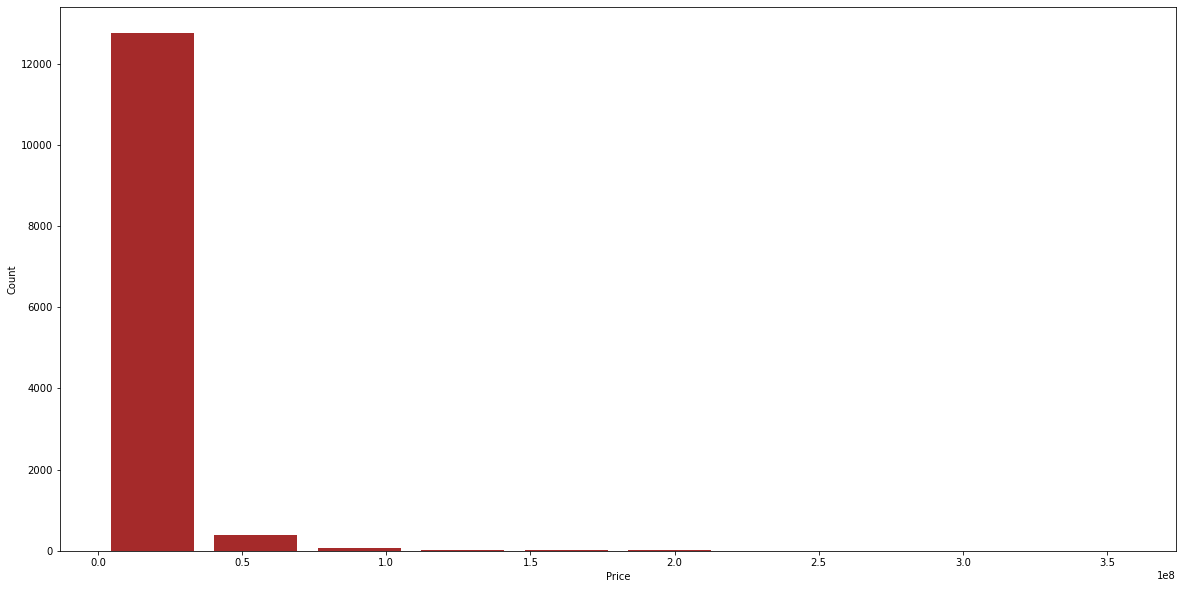

In [34]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df3.price,rwidth=0.8, color = "brown")
plt.xlabel("Price")
plt.ylabel("Count")

In [35]:
location1 = df2.groupby("location")["location"].count().sort_values(ascending=False)
location1[location1.values<10]

location
Kamakshipalya            9
Kaverappa Layout         9
Yemlur                   9
Sector 1 HSR Layout      9
4th Block Koramangala    9
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1051, dtype: int64

In [36]:
location_less_than_10 = location1[location1.values<10]

In [37]:
location_less_than_10.index

Index(['Kamakshipalya', 'Kaverappa Layout', 'Yemlur', 'Sector 1 HSR Layout',
       '4th Block Koramangala', 'Mathikere', 'Chandra Layout',
       'Jakkur Plantation', 'Volagerekallahalli', 'Vignana Nagar',
       ...
       'KPC Layout', 'Kalasipalya', 'Kalhalli', 'Kalkere Channasandra',
       'Kamdhenu Nagar', ' Banaswadi', 'Kanakadasa Layout',
       'Kanakapur main road', 'Kanakapura  Rod', 'whitefiled'],
      dtype='object', name='location', length=1051)

In [38]:
df3.location = df3.location.apply(lambda x: 'Rare' if x in location_less_than_10.index else x)

In [39]:
df3.head()

,location,size,bath,price,total_sqft_cleaned
0,Electronic City Phase II,2,2.0,3907000.0,1056.0
1,Chikka Tirupathi,4,5.0,12000000.0,2600.0
2,Uttarahalli,3,2.0,6200000.0,1440.0
3,Lingadheeranahalli,3,3.0,9500000.0,1521.0
4,Kothanur,2,2.0,5100000.0,1200.0


In [40]:
df3['price']=df3['price']/100000

In [41]:
df3.head()

,location,size,bath,price,total_sqft_cleaned
0,Electronic City Phase II,2,2.0,39.07,1056.0
1,Chikka Tirupathi,4,5.0,120.00,2600.0
2,Uttarahalli,3,2.0,62.00,1440.0
3,Lingadheeranahalli,3,3.0,95.00,1521.0
4,Kothanur,2,2.0,51.00,1200.0


In [42]:
df4=df3
df4[df4.total_sqft_cleaned/df4.size<300].head()
df4.shape

(13246, 5)

In [43]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(11351, 5)

In [44]:
df5['location']

0         Devarachikkanahalli
1         Devarachikkanahalli
2         Devarachikkanahalli
3         Devarachikkanahalli
4         Devarachikkanahalli
                 ...         
11346            Yeshwanthpur
11347            Yeshwanthpur
11348            Yeshwanthpur
11349            Yeshwanthpur
11350            Yeshwanthpur
Name: location, Length: 11351, dtype: object

In [45]:
df6 = df5.copy()
df6['price_per_sqft'] = df5['price']*100000/df5['total_sqft_cleaned']
df6.head()

,location,size,bath,price,total_sqft_cleaned,price_per_sqft
0,Devarachikkanahalli,3,2.0,44.0,1250.0,3520.000000
1,Devarachikkanahalli,2,2.0,40.0,1250.0,3200.000000
2,Devarachikkanahalli,2,2.0,83.0,1200.0,6916.666667
3,Devarachikkanahalli,2,2.0,40.0,1170.0,3418.803419
4,Devarachikkanahalli,3,2.0,65.0,1425.0,4561.403509


In [46]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

AttributeError: 'DataFrame' object has no attribute 'bhk'

In [ ]:
df6['total_sqft'] = df6['total_sqft_cleaned']
df6['bhk'] = df6['size']
df6.drop(columns=['size','total_sqft_cleaned'],inplace=True)

In [ ]:
df6.head()

In [ ]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Yeshwanthpur")

In [ ]:
df6['location'].unique()

In [ ]:
plot_scatter_chart(df6,"Yelahanka")

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is 140 lkh (with same square ft area) by building a dictionary of stats per bhk, i.e. Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [ ]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)

In [ ]:
df7.shape

In [ ]:
plot_scatter_chart(df7,"Rajaji Nagar")

In [ ]:
matplotlib.rcParams["figure.figsize"] = (5,5)
plt.hist(df7.price,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df7.bath.unique()

In [ ]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df7[df7.bath>10]

In [ ]:
df7[df7.bath>df7.bhk+2]

In [ ]:
df8= df7[df7.bath<df7.bhk+2]

In [ ]:
df8.shape

In [ ]:
df9 = df8.drop(['price_per_sqft'],axis='columns')
df9.head(3)

In [ ]:
df9.isnull().sum()

In [ ]:
dummies=pd.get_dummies(df9.location)
dummies.head()

TEST AND TRAIN

LINEAR REGRESSION